In [1]:
# initial data
IDR_BASE_URL = "http://idr.openmicroscopy.org"


In [2]:
import requests

INDEX_PAGE = "%s/webclient/?experimenter=-1" % IDR_BASE_URL

# create http session
with requests.Session() as session:
    request = requests.Request('GET', INDEX_PAGE)
    prepped = session.prepare_request(request)
    response = session.send(prepped)
    if response.status_code != 200:
        response.raise_for_status()

In [3]:
MAP_URL = "{base}/webclient/api/annotations/?type=map&{type}={screen_id}"

SCREEN_ID = 1202

qs = {'base': IDR_BASE_URL, 'type': 'screen', 'screen_id': SCREEN_ID}
url = MAP_URL.format(**qs)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    for v in a['values']:
        key = v[0]
        value = v[1]
        print (key, value)

(u'Sample Type', u'cell')
(u'Organism', u'Homo sapiens')
(u'Study Type', u'high content screen')
(u'Screen Type', u'primary screen')
(u'Screen Technology Type', u'RNAi screen')
(u'Imaging Method', u'fluorescence microscopy')
(u'Publication Title', u'Clustering phenotype populations by genome-wide RNAi and multiparametric imaging')
(u'Publication Authors', u'Fuchs F, Pau G, Kranz D, Sklyar O, Budjan C, Steinbrink S, Horn T, Pedal A, Huber W, Boutros M.')
(u'PubMed ID', u'20531400 https://www.ncbi.nlm.nih.gov/pubmed/20531400')
(u'PMC ID', u'PMC2913390 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2913390')
(u'Publication DOI', u'10.1038/msb.2010.25 https://doi.org/10.1038/msb.2010.25')
(u'Release Date', u'2016-12-16')
(u'License', u'CC-BY-NC-ND 4.0 https://creativecommons.org/licenses/by-nc-nd/4.0/')
(u'Copyright', u'Fuchs et al')
(u'Annotation File', u'idr0012-screenA-annotation.csv https://github.com/IDR/idr-metadata/blob/master/idr0012-fuchs-cellmorph/screenA/idr0012-screenA-annotation

In [4]:
PLATES_URL = "{base}/webclient/api/plates/?id={screen_id}"

SCREEN_ID = 1202

qs = {'base': IDR_BASE_URL, 'screen_id': SCREEN_ID}
url = PLATES_URL.format(**qs)
for p in session.get(url).json()['plates']:
    plate_id = p['id']
    print("Plate: {id}, Name: {name}, Children: {childCount}".format(**p))

Plate: 4287, Name: HT01, Children: 0
Plate: 4288, Name: HT02, Children: 0
Plate: 4289, Name: HT03, Children: 0
Plate: 4290, Name: HT04, Children: 0
Plate: 4291, Name: HT05, Children: 0
Plate: 4292, Name: HT06, Children: 0
Plate: 4293, Name: HT07, Children: 0
Plate: 4294, Name: HT08, Children: 0
Plate: 4296, Name: HT09, Children: 0
Plate: 5725, Name: HT10, Children: 0
Plate: 4298, Name: HT11, Children: 0
Plate: 4299, Name: HT12, Children: 0
Plate: 4300, Name: HT13, Children: 0
Plate: 4301, Name: HT14, Children: 0
Plate: 4302, Name: HT15, Children: 0
Plate: 4303, Name: HT16, Children: 0
Plate: 4304, Name: HT17, Children: 0
Plate: 4305, Name: HT18, Children: 0
Plate: 4306, Name: HT19, Children: 0
Plate: 4307, Name: HT20, Children: 0
Plate: 4308, Name: HT21, Children: 0
Plate: 4309, Name: HT22, Children: 0
Plate: 4310, Name: HT23, Children: 0
Plate: 4311, Name: HT24, Children: 0
Plate: 4312, Name: HT25, Children: 0
Plate: 4313, Name: HT26, Children: 0
Plate: 4314, Name: HT27, Children: 0
P

In [5]:
WELLS_IMAGES_URL = "{base}/webgateway/plate/{plate_id}/{field}/"

qs = {'base': IDR_BASE_URL, 'plate_id': plate_id, 'field': 0}
url = WELLS_IMAGES_URL.format(**qs)
grid = session.get(url).json()
rowlabels = grid['rowlabels']
collabels = grid['collabels']
for row in grid['grid']:
    for cell in row:
        if cell is not None:
            print("Well: {wellId}, Image: {id}".format(**cell))


Well: 1256133, Image: 3049554
Well: 1256041, Image: 3050069
Well: 1255916, Image: 3049847
Well: 1255851, Image: 3049733
Well: 1255894, Image: 3049809
Well: 1255973, Image: 3049945
Well: 1255828, Image: 3049687
Well: 1256111, Image: 3050183
Well: 1255982, Image: 3049959
Well: 1256056, Image: 3050091
Well: 1255887, Image: 3049797
Well: 1255846, Image: 3049723
Well: 1255803, Image: 3049645
Well: 1256112, Image: 3050185
Well: 1255964, Image: 3049929
Well: 1255841, Image: 3049713
Well: 1256043, Image: 3050073
Well: 1256034, Image: 3050057
Well: 1255951, Image: 3049909
Well: 1256052, Image: 3050083
Well: 1255907, Image: 3049833
Well: 1256069, Image: 3050113
Well: 1255892, Image: 3049805
Well: 1256004, Image: 3050001
Well: 1255807, Image: 3049651
Well: 1255855, Image: 3049741
Well: 1256038, Image: 3050063
Well: 1255983, Image: 3049961
Well: 1256116, Image: 3050193
Well: 1255818, Image: 3049669
Well: 1256107, Image: 3050175
Well: 1255852, Image: 3049735
Well: 1256006, Image: 3050005
Well: 1255


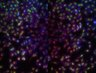
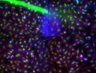
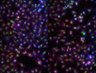
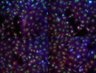
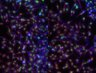
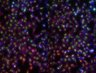
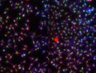
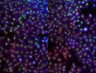
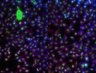
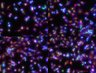
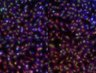
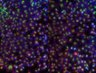
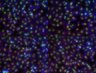
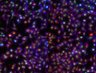
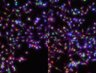
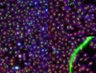
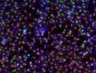
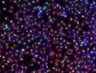
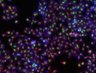
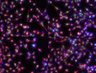
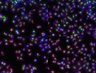
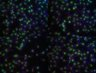
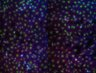
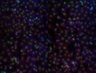
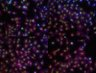
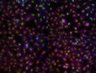
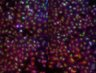
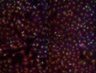
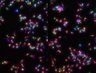
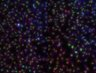
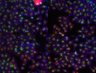
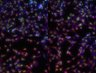
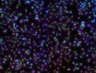
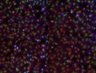
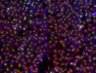
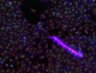
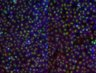
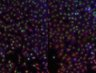
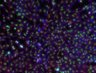
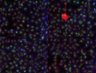
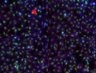
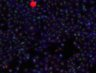
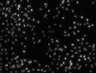
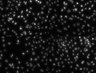
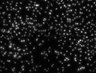
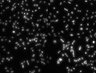
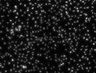
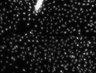
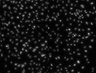
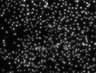
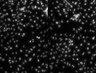
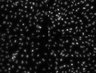
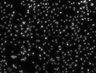
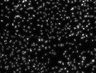
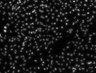
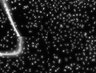
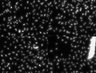
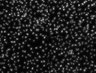
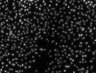
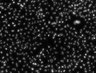
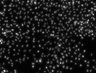
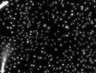
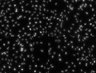
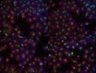
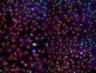
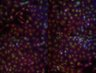
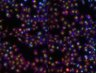
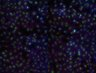
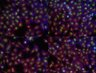
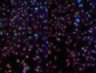
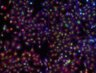
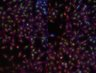
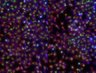
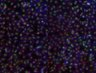
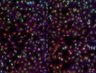
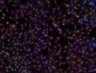
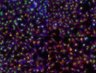
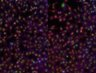
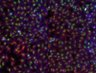
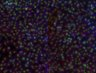
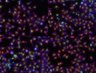
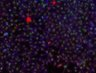
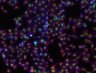
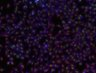
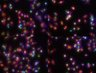
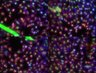
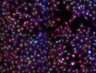
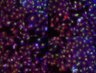
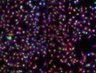
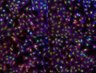
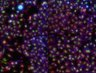
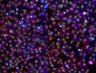
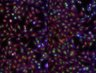
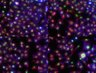
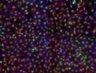
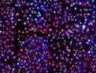
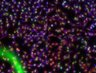
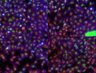
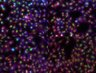
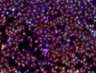
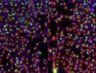
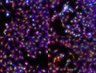
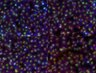
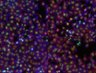
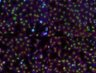
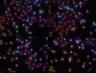
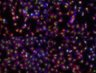
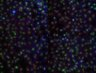
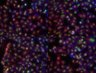
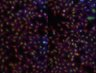
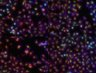
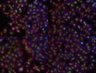
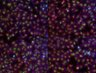
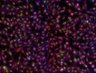
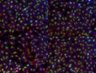
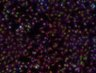
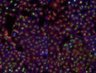
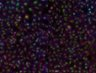
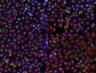
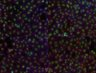
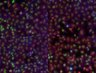
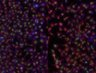
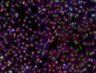
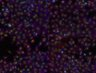
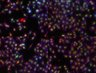
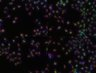
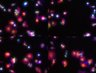
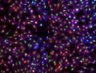
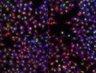
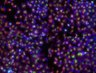
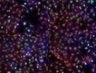
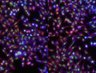
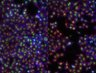
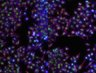
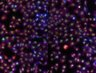
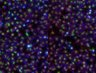
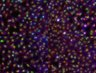
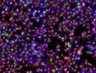
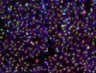
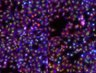
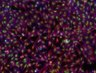
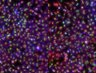
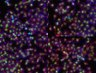
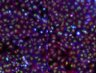
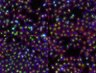
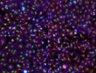
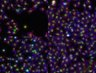
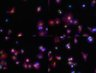
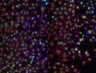
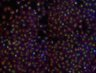
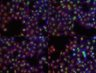
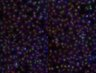
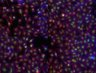
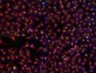
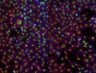
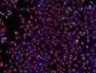
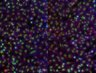
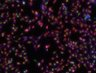
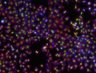
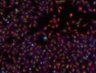
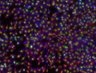
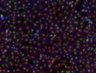
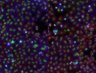
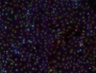
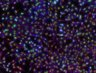
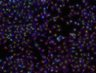
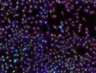
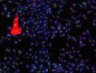
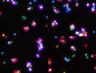
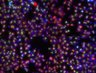
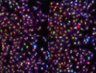
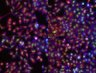
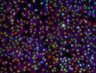
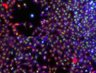
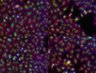
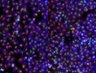
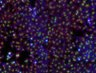
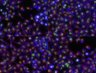
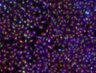
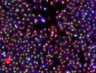
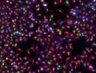
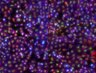
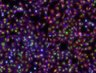
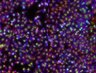
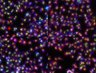
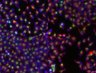
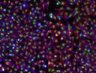
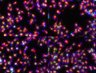
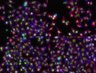
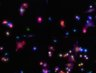
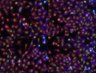
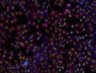
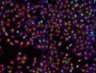
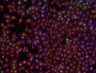
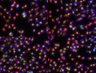
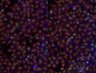
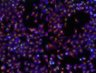
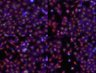
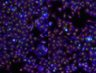
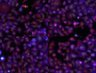
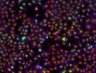
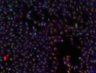
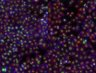
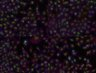
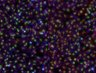
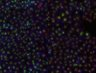
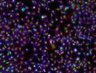
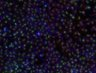
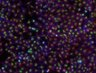
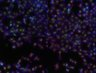
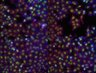
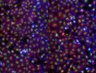
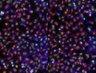
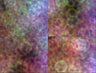
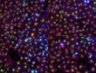
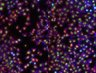
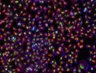
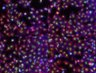
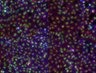
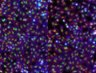
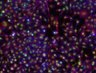
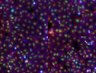
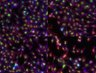
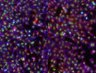
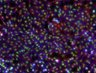
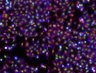
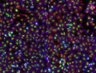
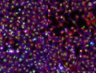
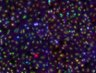
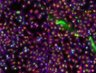
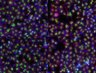
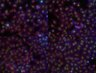
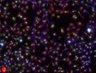
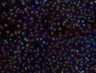
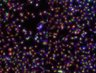
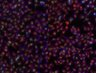
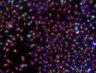
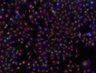
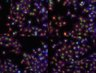
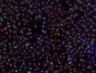
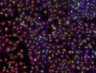
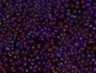
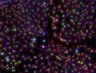
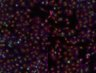
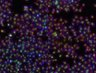
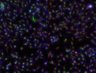
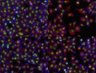
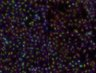
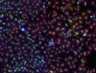
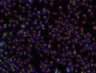
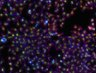
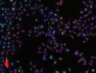
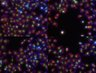
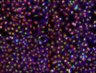
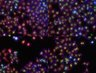
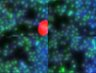
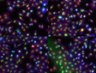
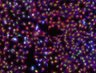
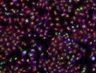
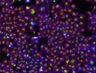
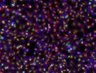
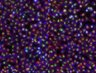
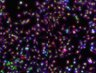
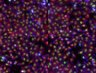
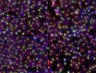
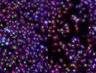
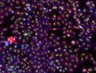
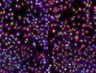
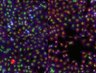
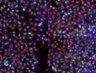
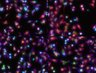
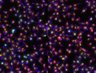
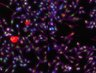
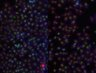
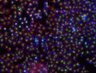
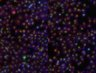
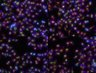
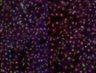
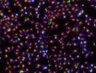
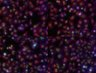
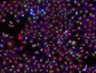
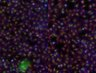
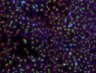
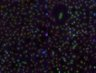
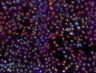
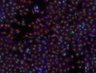
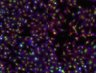
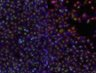
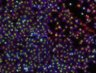
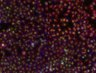
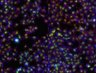
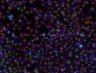
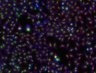
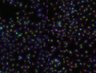
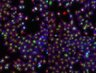
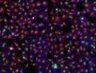
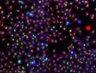
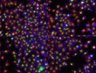
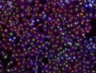
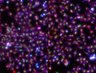
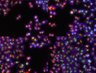
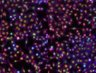
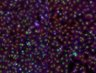
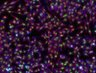
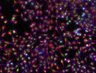
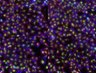
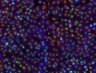
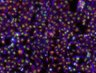
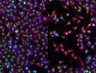
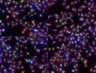
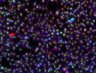
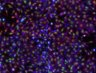
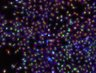
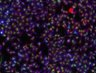
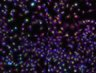
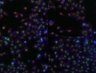
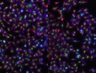
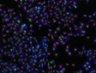
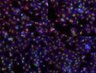
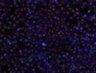
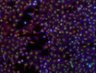
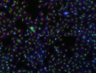
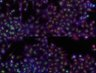
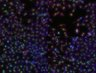
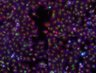
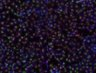
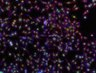
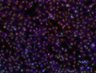
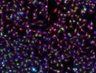
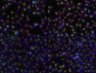
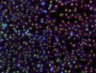
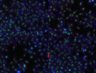
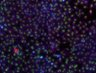
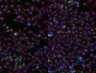
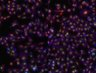
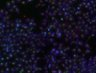

In [6]:
from IPython.display import display, HTML

WELLS_IMAGES_URL = "{base}/webgateway/plate/{plate_id}/{field}/"
PLATE_ID = 4287

qs = {'base': IDR_BASE_URL, 'plate_id': PLATE_ID, 'field': 0}
url = WELLS_IMAGES_URL.format(**qs)
grid = session.get(url).json()

image_ids = [cell['id']  for row in grid['grid'] for cell in row if cell is not None]

THUMBNAILS_URL = "{base}/webgateway/get_thumbnails/".format(**{'base': IDR_BASE_URL, })

def thumbnails_chunk(image_list, batch):
    for b in xrange(0, len(image_list), batch):
        yield image_list[b:b + batch]
batch_size = 20

_thumbnails = {}
for batch in thumbnails_chunk(image_ids, batch_size):
    payload = {'id': batch}
    for iid, thumb in session.get(THUMBNAILS_URL, params=payload).json().iteritems():
        _thumbnails[long(iid)] = thumb

# Display plate
_tbody = []
for row in grid['grid']:
    _tr = ["<tr>"]
    for cell in row:
        if cell is not None:
            _tr.append('<td><img src="%s"/></td>' % _thumbnails[cell['id']])
        else:
            _tr.append('<td></td>')
    _tr.append("</tr>")
    _tbody.append("&nbsp;".join(_tr))
display(HTML("<table>" + "".join(_tbody) + "</table>"))

In [7]:
from IPython.display import display, HTML

IMAGE_DETAILS_URL = "{base}/webclient/imgData/{image_id}/"

IMAGE_ID = 3049554

qs = {'base': IDR_BASE_URL, 'image_id': IMAGE_ID}
url = IMAGE_DETAILS_URL.format(**qs)
r = session.get(url)
if r.status_code == 200:
    print (r.json())

RENDER_IMAGE = "{base}/webgateway/render_image/{image_id}/0/0/"
img_url = RENDER_IMAGE.format(**qs)

display(HTML("<img src='%s' />" % img_url))

{u'init_zoom': 0, u'tiles': False, u'perms': {u'canAnnotate': False, u'canEdit': False, u'canDelete': False, u'canLink': False}, u'split_channel': {u'c': {u'width': 2694, u'border': 2, u'gridy': 2, u'gridx': 2, u'height': 2054}, u'g': {u'width': 2694, u'border': 2, u'gridy': 2, u'gridx': 2, u'height': 2054}}, u'rdefs': {u'defaultT': 0, u'model': u'color', u'defaultZ': 0, u'invertAxis': False, u'projection': u'normal'}, u'pixel_range': [0, 65535], u'interpolate': True, u'channels': [{u'coefficient': 1.0, u'family': u'linear', u'color': u'FF0000', u'emissionWave': None, u'inverted': False, u'window': {u'max': 1741.0, u'min': 232.0, u'end': 1741.0, u'start': 232.0}, u'active': True, u'label': u'0', u'reverseIntensity': False}, {u'coefficient': 1.0, u'family': u'linear', u'color': u'00FF00', u'emissionWave': None, u'inverted': False, u'window': {u'max': 3441.0, u'min': 37.0, u'end': 3441.0, u'start': 37.0}, u'active': True, u'label': u'1', u'reverseIntensity': False}, {u'coefficient': 1.0,

In [8]:
MAP_URL = "{base}/webclient/api/annotations/?type=map&{type}={image_id}"

IMAGE_ID = 1874112

qs = {'base': IDR_BASE_URL, 'type': 'image', 'image_id': IMAGE_ID}
url = MAP_URL.format(**qs)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    for v in a['values']:
        key = v[0]
        value = v[1]
        print (key, value)

(u'Cell Line', u'MCF12A')
(u'Cell Type\\Genetic Subtype (Neve et al., Cancer Cell 2006)', u'Basal B non-tumor')
(u'Cell Line Morphotype', u'Mesenchymal (B cluster)')
(u'Compound Name', u'nocodazole')
(u'Compound Name URL', u'https://www.ncbi.nlm.nih.gov/pccompound?term=nocodazole')
(u'Dose', u'2 microgram per milliliter')
(u'Time', u'5 hour')
(u'Organism', u'Homo sapiens')
(u'Media', u'DMEM:F12 + 5% HI-FBS')
(u'Channels', u'DAPI: nuclei;Alexa-488: NF-kappaB;dihydroethidium(DHE): cell bodies')


In [9]:
BULK_URL = "{base}/webgateway/table/Screen.plateLinks.child.wells/{well_id}/query/?query=Well-{well_id}"

WELL_ID = 45217
qs = {'base': IDR_BASE_URL, 'well_id': WELL_ID}
url = BULK_URL.format(**qs)
r = session.get(url)
print (r.json())


# or download entire bulk_annotation file:

FILEANNOTATION_URL = "{base}/webclient/api/annotations/?type=file&screen={screen_id}"
DOWNLOAD_URL = "{base}/webclient/annotation/{ann_id}"

SCREEN_ID = 1202

qs = {'base': IDR_BASE_URL, 'screen_id': SCREEN_ID}
url = FILEANNOTATION_URL.format(**qs)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    ann_id = a['id']
    qs2 = {'base': IDR_BASE_URL, 'ann_id':  a['id']}
    url2 = DOWNLOAD_URL.format(**qs2)
    print ("Download URL:", url2)

{u'parentId': 206, u'addedBy': u'Public data', u'parentType': u'Screen', u'annId': 8368945, u'owner': u'Public data', u'data': {u'rows': [[340, u'338', 45217, u'Plate8_Actinome1_O2', u'Homo sapiens', u'NCBITaxon', u'NCBITaxon_9606', u'HeLa', u'EFO', u'EFO_0001185', u'ECT2-02', u'ECT2', u'D-006450-02', u'GCACUCACCUUGUAGUUGA', u'', u'NM_018098', u'ECT2', u'siRNA Pool Identifiers/Gene symbols from GRCh37, Ensembl release 56, Sept 2009', u'Gene Symbol added using siRNA Pool Identifier name by IDR curator', u'', u'', u'DAPI:DNA;FITC-FilterWheel:alpha-tubulin;TIRTC-FilterWheel:phallodin/F-actin', u'', u'yes', u'yes', u'yes', u'yes', u'gene', u'', u'', u'', u'', u'', u'', u'increased cytoplasmic actin', u'increased actin localised to the cytoplasm', u'CMPO_0000296', u'increased actin over nucleus', u'increased actin localised to the nucleus', u'CMPO_0000294', u'', u'', u'', u'increased width of lamellae', u'increased lamellipodia width phenotype', u'CMPO_0000276', u'', u'', u'', u'', u'', u''

In [10]:
SCREENS_PROJECTS_URL = "{base}/mapr/api/{key}/?value={value}"

qs = {'base': IDR_BASE_URL, 'key': 'gene', 'value': 'CDC20'}
url = SCREENS_PROJECTS_URL.format(**qs)
for s in session.get(url).json()['screens']:
    screen_id = s['id']
    print (s['id'], s['name'])

(102, u'idr0002-heriche-condensation/screenA (24)')
(51, u'idr0003-breker-plasticity/screenA (15)')
(253, u'idr0006-fong-nuclearbodies/screenA (48)')
(201, u'idr0007-srikumar-sumo/screenA (9)')
(251, u'idr0009-simpson-secretion/screenA (12)')
(1351, u'idr0010-doil-dnadamage/screenA (4)')
(1551, u'idr0011-ledesmafernandez-dad4/screenB (13)')
(1602, u'idr0011-ledesmafernandez-dad4/screenD (21)')
(1202, u'idr0012-fuchs-cellmorph/screenA (2)')
(1101, u'idr0013-neumann-mitocheck/screenA (6)')
(1302, u'idr0013-neumann-mitocheck/screenB (8)')
(1204, u'idr0020-barr-chtog/screenA (120)')


In [11]:
PLATES_URL = "{base}/mapr/api/{key}/plates/?value={value}&id={screen_id}"

qs = {'base': IDR_BASE_URL, 'key': 'gene', 'value': 'CDC20', 'screen_id': screen_id}
url = PLATES_URL.format(**qs)
for p in session.get(url).json()['plates']:
    plate_id = p['id']
    print (p['id'], p['name'])

(4357, u'200972429 TOG[2702]')
(4401, u'200972430 TOG[2703]')
(4451, u'200972431 NS[2667]')
(4453, u'200972432 NS[2668]')


In [12]:
IMAGES_URL = "{base}/mapr/api/{key}/images/?value={value}&node={parent_type}&id={parent_id}"

IMAGE_URL = "{base}/webclient/?show=image-{image_id}"
IMAGE_VIEWER = "{base}/webclient/img_detail/{image_id}/"
THUMBNAIL_URL = "{base}/webclient/render_thumbnail/{image_id}/"
ATTRIBUTES_URL = "{base}/webclient/api/annotations/?type=map&image={image_id}"

qs = {'base': IDR_BASE_URL, 'key': 'gene', 'value': 'CDC20', 'parent_type': 'plate', 'parent_id': plate_id}
url = IMAGES_URL.format(**qs)
for i in session.get(url).json()['images']:
    image_id = i['id']
    print 'Image link:', IMAGE_URL.format(**{'base': IDR_BASE_URL, 'image_id': image_id})
    print 'Image viewer link:', IMAGE_VIEWER.format(**{'base': IDR_BASE_URL, 'image_id': image_id})
    print 'Thumbnail URL:', THUMBNAIL_URL.format(**{'base': IDR_BASE_URL, 'image_id': image_id})
    url = ATTRIBUTES_URL.format(**{'base': IDR_BASE_URL, 'image_id': image_id})
    print 'Annotations:'
    for a in session.get(url).json()['annotations']:
        print '\t%s' % a['values']

Image link: http://idr.openmicroscopy.org/webclient/?show=image-1915895
Image viewer link: http://idr.openmicroscopy.org/webclient/img_detail/1915895/
Thumbnail URL: http://idr.openmicroscopy.org/webclient/render_thumbnail/1915895/
Annotations:
	[[u'Cell Line', u'HeLa']]
	[[u'Gene Identifier', u'991'], [u'Gene Identifier URL', u'https://www.ncbi.nlm.nih.gov/gene/991'], [u'Gene Symbol', u'CDC20']]
	[[u'RefSeq Accession', u'NM_001255'], [u'RefSeq Accession URL', u'http://www.ncbi.nlm.nih.gov/nuccore/NM_001255'], [u'RefSeq GI Number', u'4557436']]
	[[u'Organism', u'Homo sapiens']]
	[[u'siRNA Pool Identifier', u'L-003225-00'], [u'siRNA Identifier', u'']]
	[[u'siRNA Sequences', u'CGGAAGACCUGCCGUUACA;GGGCCGAACUCCUGGCAAA;GAUCAAAGAGGGCAACUAC;CAGAACAGACUGAAAGUAC']]
	[[u'shRNA', u'non-silencing shRNA'], [u'Channels', u'Hoescht: nuclei;Anti-Ser10 PhosphoHistone H3: mitotic nuclei;Anti-alpha-tubulin: microtubules;RFP: whole cell']]
Image link: http://idr.openmicroscopy.org/webclient/?show=image-19

	[[u'Cell Line', u'HeLa']]
	[[u'Gene Identifier', u'991'], [u'Gene Identifier URL', u'https://www.ncbi.nlm.nih.gov/gene/991'], [u'Gene Symbol', u'CDC20']]
	[[u'RefSeq Accession', u'NM_001255'], [u'RefSeq Accession URL', u'http://www.ncbi.nlm.nih.gov/nuccore/NM_001255'], [u'RefSeq GI Number', u'4557436']]
	[[u'Organism', u'Homo sapiens']]
	[[u'siRNA Pool Identifier', u'L-003225-00'], [u'siRNA Identifier', u'']]
	[[u'siRNA Sequences', u'CGGAAGACCUGCCGUUACA;GGGCCGAACUCCUGGCAAA;GAUCAAAGAGGGCAACUAC;CAGAACAGACUGAAAGUAC']]
	[[u'shRNA', u'non-silencing shRNA'], [u'Channels', u'Hoescht: nuclei;Anti-Ser10 PhosphoHistone H3: mitotic nuclei;Anti-alpha-tubulin: microtubules;RFP: whole cell']]
Image link: http://idr.openmicroscopy.org/webclient/?show=image-1915906
Image viewer link: http://idr.openmicroscopy.org/webclient/img_detail/1915906/
Thumbnail URL: http://idr.openmicroscopy.org/webclient/render_thumbnail/1915906/
Annotations:
	[[u'Cell Line', u'HeLa']]
	[[u'Gene Identifier', u'991'], [u'Gene

	[[u'Cell Line', u'HeLa']]
	[[u'Gene Identifier', u'991'], [u'Gene Identifier URL', u'https://www.ncbi.nlm.nih.gov/gene/991'], [u'Gene Symbol', u'CDC20']]
	[[u'RefSeq Accession', u'NM_001255'], [u'RefSeq Accession URL', u'http://www.ncbi.nlm.nih.gov/nuccore/NM_001255'], [u'RefSeq GI Number', u'4557436']]
	[[u'Organism', u'Homo sapiens']]
	[[u'siRNA Pool Identifier', u'L-003225-00'], [u'siRNA Identifier', u'']]
	[[u'siRNA Sequences', u'CGGAAGACCUGCCGUUACA;GGGCCGAACUCCUGGCAAA;GAUCAAAGAGGGCAACUAC;CAGAACAGACUGAAAGUAC']]
	[[u'shRNA', u'non-silencing shRNA'], [u'Channels', u'Hoescht: nuclei;Anti-Ser10 PhosphoHistone H3: mitotic nuclei;Anti-alpha-tubulin: microtubules;RFP: whole cell']]
Image link: http://idr.openmicroscopy.org/webclient/?show=image-1915878
Image viewer link: http://idr.openmicroscopy.org/webclient/img_detail/1915878/
Thumbnail URL: http://idr.openmicroscopy.org/webclient/render_thumbnail/1915878/
Annotations:
	[[u'Cell Line', u'HeLa']]
	[[u'Gene Identifier', u'991'], [u'Gene

In [13]:
MAP_URL = "{base}/webclient/api/annotations/?type=map&{type}={project_id}"

project_id = 351

qs = {'base': IDR_BASE_URL, 'type': 'project', 'project_id': project_id}
url = MAP_URL.format(**qs)
for a in session.get(url).json()['annotations']:
    namespace = a['ns']
    for v in a['values']:
        key = v[0]
        value = v[1]
        print (key, value)

(u'Experiment A', u'https://idr.openmicroscopy.org/webclient//?show=project-351')
(u'Experiment B', u'https://idr.openmicroscopy.org/webclient//?show=project-352')
(u'Experiment C', u'https://idr.openmicroscopy.org/webclient//?show=project-353')
(u'Overview', u'https://idr.openmicroscopy.org/webclient//?show=project-354')
(u'Sample Type', u'tissue')
(u'Organism', u'Mus musculus')
(u'Study Type', u'time-lapse imaging')
(u'Imaging Method', u'light sheet fluorescence microscopy')
(u'Publication Title', u'Ex vivo live cell tracking in kidney organoids using light sheet fluorescence microscopy')
(u'Publication Authors', u'Marie Held, Ilaria Santeramo, Bettina Wilm, Patricia Murray, Raphael Levy')
(u'PubMed ID', u'30048451 https://www.ncbi.nlm.nih.gov/pubmed/30048451')
(u'PMC ID', u'PMC6062017 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6062017')
(u'Publication DOI', u'10.1371/journal.pone.0199918 https://doi.org/10.1371/journal.pone.0199918')
(u'Release Date', u'2017-12-04')
(u'License', u

In [14]:
DATASET_URL = "{base}/webclient/api/datasets/?id={project_id}"
IMAGE_URL = "{base}/webclient/api/images/?id={dataset_id}"
project_id = 351

qs = {'base': IDR_BASE_URL, 'project_id': project_id}
url = DATASET_URL.format(**qs)
for p in session.get(url).json()['datasets']:
    dataset_id = p['id']
    print("Dataset: {id}, Name: {name}, Children: {childCount}".format(**p))
    qs = {'base': IDR_BASE_URL, 'dataset_id': dataset_id}
    url = IMAGE_URL.format(**qs)
    for i in session.get(url).json()['images']:
        print("sdfdsgsdf%s", i)
        MAP_URL = "{base}/webclient/api/annotations/?type=map&{type}={image_id}"

        IMAGE_ID = i['id']

        qs = {'base': IDR_BASE_URL, 'type': 'image', 'image_id': IMAGE_ID}
        url = MAP_URL.format(**qs)
        for a in session.get(url).json()['annotations']:
            namespace = a['ns']
            for v in a['values']:
                key = v[0]
                value = v[1]
                print (key, value)
    

Dataset: 701, Name: endpoint imaging Cytokeratin PNA, Children: 20
('sdfdsgsdf%s', {u'filesetId': 23653, u'ownerId': 2, u'id': 3414011, u'permsCss': u'', u'name': u'10percent-Wt1-GFP-spheroid-MV.czi [0]'})
(u'Organism', u'Mus musculus')
(u'Sample Description', u'90% wildtype mouse embryonic (E13.5) kidney cells and 10% Wt1tm1Nhsn strain embryonic (E13.5) kidney cells, endpoint staining, CLARITY cleared, immunofluorescence, fixed, organoid, six day culture')
(u'Strain', u'CD1 mus strain')
(u'Genotype', u'90% wildtype and 10% Wt1 tm1Nhsn (Wt1 +/GFP)')
(u'Organism Part', u'kidney')
(u'Developmental Stage', u'embryonic day 13.5')
(u'Material Type', u'organoid')
(u'Growth Condition', u'organoid cells cultured for 6 days')
(u'Clearing', u'CLARITY cleared')
(u'Treatment', u'Antibodies: PNA-rh 30ug/ml 30 mins')
(u'Channels', u'Wt1-GFP:Wt1tm1Nhsn cells expressing GFP in cytoplasm, green;PNA-rh:Peanut agglutanin conjugated with rhodamine labelling basement membranes, red')
(u'Image File Type', u

(u'Organism', u'Mus musculus')
(u'Sample Description', u'wildtype mouse embryonic (E13.5) kidney cells, endpoint staining, CLARITY cleared, immunofluorescence, fixed, organoid, six day culture')
(u'Strain', u'CD1 mus strain')
(u'Genotype', u'wild type genotype')
(u'Organism Part', u'kidney')
(u'Developmental Stage', u'embryonic day 13.5')
(u'Material Type', u'organoid')
(u'Growth Condition', u'organoid cells cultured for 6 days')
(u'Clearing', u'CLARITY cleared')
(u'Treatment', u'Antibodies: Laminin: 1:1000 overnight, Megalin 1: 200 overnight')
(u'Channels', u'Laminin: basement membrane, green;Megalin:tubular lumen,red;Autofluorescence:Autoflourescence,far red')
(u'Image File Type', u'raw')
(u'Image Dimensions', u'X 1920 Y 1920 Z 578 C 3 V 5 T 1')
(u'Image File Comments', u'In IDR, there is one multi-dimensional image per imaging angle.')
('sdfdsgsdf%s', {u'filesetId': 23654, u'ownerId': 2, u'id': 3414020, u'permsCss': u'', u'name': u'Lam-Cytok-MV.czi [4]'})
(u'Organism', u'Mus musculu

(u'Organism', u'Mus musculus')
(u'Sample Description', u'wildtype mouse embryonic (E13.5) kidney rudiment, endpoint staining, CLARITY cleared, immunofluorescence, fixed, E 13.5 kidney rudiment')
(u'Strain', u'CD1 mus strain')
(u'Genotype', u'wild type genotype')
(u'Organism Part', u'kidney')
(u'Developmental Stage', u'embryonic day 13.5')
(u'Material Type', u'organism part')
(u'Clearing', u'CLARITY cleared')
(u'Treatment', u'Antibodies: Nephrin 1:180 overnight, PNA-rh 30ug/ml 30 mins, cytokeratin 1:100 overnight')
(u'Channels', u'Nephrin:renal podocytes, green;PNA-rh:Peanut agglutanin conjugated with rhodamine labelling basement membranes, red; Cytokeratin:ureteric bud, far red')
(u'Image File Type', u'raw')
(u'Image Dimensions', u'X 1920 Y 1920 Z 872 C 3 V 5 T 1')
(u'Image File Comments', u'Nephrin immunofluorescence stain in channel X did not work due to lack of podocytes. In IDR, there is one multi-dimensional image per imaging angle.')
('sdfdsgsdf%s', {u'filesetId': 23652, u'ownerI

(u'Organism', u'Mus musculus')
(u'Sample Description', u'Wt1tm1Nhsn strain embryonic (E13.5) kidney cells, endpoint staining, not cleared, immunofluorescence, fixed, organoid, six day culture')
(u'Strain', u'CD1 mus strain')
(u'Genotype', u'Wt1 tm1Nhsn (Wt1 +/GFP)')
(u'Organism Part', u'kidney')
(u'Developmental Stage', u'embryonic day 13.5')
(u'Material Type', u'organoid')
(u'Growth Condition', u'organoid cells cultured for 6 days')
(u'Clearing', u'not cleared')
(u'Treatment', u'Antibodies: Laminin: 1:1000 overnight, PNA-rh 30ug/ml 30 mins, Synaptopodin: 1:1 overnight')
(u'Channels', u'Wt1-GFP:Wt1tm1Nhsn cells expressing GFP in cytoplasm, green;Laminin:basement membrane, blue;PNA-rh:Peanut agglutanin conjugated with rhodamine labelling basement membranes, red;Synaptopodin:renal podocytes, far red')
(u'Image File Type', u'raw')
(u'Image Dimensions', u'X 1920 Y 1920 Z 400 C 4 V 5 T 1')
(u'Image File Comments', u'In IDR, there is one multi-dimensional image per imaging angle.')
('sdfdsgs

(u'Organism', u'Mus musculus')
(u'Sample Description', u'wildtype mouse embryonic (E13.5) kidney rudiment, endpoint staining, CLARITY cleared, immunofluorescence, fixed, E 13.5 kidney rudiment')
(u'Strain', u'CD1 mus strain')
(u'Genotype', u'wild type genotype')
(u'Organism Part', u'kidney')
(u'Developmental Stage', u'embryonic day 13.5')
(u'Material Type', u'organism part')
(u'Clearing', u'CLARITY cleared')
(u'Treatment', u'Antibodies: Laminin: 1:1000 overnight, PNA-rh 30ug/ml 30 mins,  Megalin 1: 200 overnight')
(u'Channels', u'Laminin:basement membrane, blue;PNA-rh: Peanut agglutanin conjugated with rhodamine labelling basement membranes, red;Megalin:tubular lumen, far red')
(u'Image File Type', u'raw')
(u'Image Dimensions', u'X 1920 Y 1600 Z 395 C 3 V 1 T 1')
(u'Image File Comments', u'In IDR, there is one multi-dimensional image per imaging angle.')
('sdfdsgsdf%s', {u'filesetId': 23657, u'ownerId': 2, u'id': 3414035, u'permsCss': u'', u'name': u'FK-09-MV.czi [4]'})
(u'Organism', u

(u'Organism', u'Mus musculus')
(u'Sample Description', u'wildtype mouse embryonic (E13.5) kidney cells, endpoint staining, not cleared, immunofluorescence, fixed, organoid, six day culture')
(u'Strain', u'CD1 mus strain')
(u'Genotype', u'wild type genotype')
(u'Organism Part', u'kidney')
(u'Developmental Stage', u'embryonic day 13.5')
(u'Material Type', u'organoid')
(u'Clearing', u'not cleared')
(u'Treatment', u'Antibodies: Laminin: 1:1000 overnight, Megalin 1: 200 overnight')
(u'Channels', u'Autofluorescence:Autofluorescence, green;Laminin:basement membrane, blue;Megalin:tubular lumen, far red')
(u'Image File Type', u'raw')
(u'Image Dimensions', u'X 1920 Y 1920 Z 534 C 3 V 5 T 1')
(u'Image File Comments', u'In IDR, there is one multi-dimensional image per imaging angle.')
('sdfdsgsdf%s', {u'filesetId': 23659, u'ownerId': 2, u'id': 3414044, u'permsCss': u'', u'name': u'GFP-2hrs-2ndy-uncleared-2_DualSideFusion.czi [3]'})
(u'Organism', u'Mus musculus')
(u'Sample Description', u'wildtype 

(u'Organism', u'Mus musculus')
(u'Sample Description', u'wildtype mouse embryonic (E13.5) kidney cells, endpoint staining, CLARITY cleared, immunofluorescence, fixed, organoid, six day culture')
(u'Strain', u'CD1 mus strain')
(u'Genotype', u'wild type genotype')
(u'Organism Part', u'kidney')
(u'Developmental Stage', u'embryonic day 13.5')
(u'Material Type', u'organoid')
(u'Growth Condition', u'organoid cells cultured for 6 days')
(u'Clearing', u'CLARITY cleared')
(u'Treatment', u'Antibodies: Pax2: 1:200 overnight, PNA-rh 30ug/ml 30 mins')
(u'Channels', u'Pax2:metanephric mesenchyme, green;PNA-rh:Peanut agglutanin conjugated with rhodamine labelling basement membranes, red;Autofluorescence:Autofluorescence')
(u'Image File Type', u'raw')
(u'Image Dimensions', u'X 1920 Y 1920 Z 769 C 3 V 5 T 1')
(u'Image File Comments', u'In IDR, there is one multi-dimensional image per imaging angle.')
('sdfdsgsdf%s', {u'filesetId': 23664, u'ownerId': 2, u'id': 3414058, u'permsCss': u'', u'name': u'Pax2-

(u'Organism', u'Mus musculus')
(u'Sample Description', u'Wt1tm1Nhsn strain embryonic (E13.5) kidney cells, endpoint staining, not cleared, immunofluorescence, fixed, organoid, six day culture')
(u'Strain', u'CD1 mus strain')
(u'Genotype', u'Wt1 tm1Nhsn (Wt1 +/GFP)')
(u'Organism Part', u'kidney')
(u'Developmental Stage', u'embryonic day 13.5')
(u'Material Type', u'organoid')
(u'Growth Condition', u'organoid cells cultured for 6 days')
(u'Clearing', u'not cleared')
(u'Treatment', u'Antibodies: Six2: 1:200 overnight, PNA-rh 30ug/ml 30 mins, Synaptopodin 1:1 overnight')
(u'Channels', u'Wt1-GFP:Wt1tm1Nhsn cells expressing GFP in cytoplasm, green;Six2:metanephric mesenchyme, blue;PNA-rh:Peanut agglutanin conjugated with rhodamine labelling basement membranes, red;Synaptopodin:renal podocytes, far red')
(u'Image File Type', u'raw')
(u'Image Dimensions', u'X 1920 Y 1920 Z 463 C 4 V 5 T 1')
(u'Image File Comments', u'In IDR, there is one multi-dimensional image per imaging angle.')
('sdfdsgsdf%

(u'Organism', u'Mus musculus')
(u'Sample Description', u'wildtype mouse embryonic (E13.5) kidney rudiment, endpoint staining, CLARITY cleared, immunofluorescence, fixed, E 13.5 kidney rudiment')
(u'Strain', u'CD1 mus strain')
(u'Genotype', u'Wt1 tm1Nhsn (Wt1 +/GFP)')
(u'Organism Part', u'kidney')
(u'Developmental Stage', u'embryonic day 13.5')
(u'Material Type', u'organism part')
(u'Clearing', u'CLARITY cleared')
(u'Treatment', u'Antibodies: none')
(u'Channels', u'Wt1-GFP:Wt1tm1Nhsn cells expressing GFP in cytoplasm, green;TL:transmitted light')
(u'Image File Type', u'raw')
(u'Image Dimensions', u'X 1920 Y 1920 Z 746 C 2 V 1 T 1')
